# **Verteilte Datenverarbeitung mit Spark**

## 1) Wie viele Kunden-Datensätze gibt es in der Datei *iw_customer.txt* ? Zeige die ersten 5 Kunden

In [12]:
data = spark.read.option("delimiter", "\t").csv("gs://dataproc-staging-us-central1-989776300789-qenq3uts/webshop/iw_customer.txt", header="True", inferSchema=True)
plz_mapping =  spark.read.option("delimiter", "\t").csv("gs://dataproc-staging-us-central1-989776300789-qenq3uts/webshop/plz_mapping.txt", header="True", inferSchema=True)
data.registerTempTable("customer")
plz_mapping.registerTempTable("plz_mapping")

In [6]:
spark.sql("SELECT count(*) FROM customer").show()
spark.sql("SELECT * FROM customer ORDER By customerNo ASC LIMIT 5").show()

+--------+
|count(1)|
+--------+
|  247065|
+--------+

+-----+----------+----------+---------+-------+--------+-----------+-------------+-------------+----------+-------------------+--------+------+-----------+
|owner|customerNo|salutation|firstname|surname|postcode|       city|       street|        eMail|newsletter|          birthdate|  riskID|credit|creditLimit|
+-----+----------+----------+---------+-------+--------+-----------+-------------+-------------+----------+-------------------+--------+------+-----------+
|   IW| KNR000001|      Frau|    Abcde|Hijklmn|   65232|Taunusstein|Opqrst-Street|mail@mail.com|         1|1968-01-07 00:00:00|69918055|   400|          1|
|   IW| KNR000002|      Frau|    Abcde|Hijklmn|   26904|     Börger|Opqrst-Street|mail@mail.com|         0|1978-10-10 00:00:00|92843675|  1000|          1|
|   IW| KNR000003|      Frau|    Abcde|Hijklmn|   78333|   Stockach|Opqrst-Street|mail@mail.com|         1|1967-04-29 00:00:00|11272894|     0|          2|
|   IW| 

## 2) Entfernen Sie Attribute aus dem DataFrame (owner, firstname, lastname, street, eMail)

In [7]:
enfAttr = df.drop("owner", "firstname", "lastname", "street", "eMail")
enfAttr.show(10)
enfAttr.registerTempTable("enfAttr")

+----------+----------+-------+--------+--------------------+----------+-------------------+--------+------+-----------+
|customerNo|salutation|surname|postcode|                city|newsletter|          birthdate|  riskID|credit|creditLimit|
+----------+----------+-------+--------+--------------------+----------+-------------------+--------+------+-----------+
| KNR000001|      Frau|Hijklmn|   65232|         Taunusstein|         1|1968-01-07 00:00:00|69918055|   400|          1|
| KNR000002|      Frau|Hijklmn|   26904|              Börger|         0|1978-10-10 00:00:00|92843675|  1000|          1|
| KNR000003|      Frau|Hijklmn|   78333|            Stockach|         1|1967-04-29 00:00:00|11272894|     0|          2|
| KNR000011|      Frau|Hijklmn|   79618|         Rheinfelden|         1|1974-10-21 00:00:00|86364865|   400|          1|
| KNR000020|      Frau|Hijklmn|   64625|            Bensheim|         1|1969-03-23 00:00:00|79987284|   500|          1|
| KNR000022|      Herr|Hijklmn| 

## 3) Entfernen Sie alle Kunden, die vor 1900 geboren worden sind, aus dem DataFrame

In [8]:
enfKunden = spark.sql("SELECT * From enfAttr WHERE YEAR(birthdate) >= 1900 ORDER By birthdate")
enfKunden.show(25)
enfKunden.registerTempTable("enfKunden")

+----------+----------+-------+--------+------------+----------+-------------------+--------+------+-----------+
|customerNo|salutation|surname|postcode|        city|newsletter|          birthdate|  riskID|credit|creditLimit|
+----------+----------+-------+--------+------------+----------+-------------------+--------+------+-----------+
| KNR386691|      Frau|Hijklmn|   45479|     Mülheim|         1|1900-01-01 00:00:00|50890805|   400|          1|
| KNR357620|      Herr|Hijklmn|   80809|     München|         1|1900-01-01 00:00:00|68643884|   500|          1|
| KNR099740|      Frau|Hijklmn|   45479|     Mülheim|         1|1900-01-01 00:00:00|50890805|   400|          1|
| KNR400532|      Frau|Hijklmn|   45479|     Mülheim|         0|1900-01-01 00:00:00|50890805|   400|          1|
| KNR057030|      Frau|Hijklmn|   91522|     Ansbach|         1|1900-01-01 00:00:00|94507194|   700|          1|
| KNR143652|      Herr|Hijklmn|   32694|   Dörentrup|         0|1900-01-01 00:00:00|21817596|   

## 4) Nennen Sie das Attribut 'birthdate' in 'birthyear' um und speichern Sie entsprechend nur noch das Geburtsjahr im DataFrame

In [9]:
namenAEndern = spark.sql("SELECT customerNo, salutation, postcode, city, newsletter, (substring(birthdate, 1,4)) as birthyear, riskID, credit, creditLimit FROM enfKunden")
namenAEndern.show(10)
namenAEndern.registerTempTable("namenAEndern")

+----------+----------+--------+------------+----------+---------+--------+------+-----------+
|customerNo|salutation|postcode|        city|newsletter|birthyear|  riskID|credit|creditLimit|
+----------+----------+--------+------------+----------+---------+--------+------+-----------+
| KNR057030|      Frau|   91522|     Ansbach|         1|     1900|94507194|   700|          1|
| KNR035221|      Herr|   44795|      Bochum|         0|     1900|52073975|   500|          1|
| KNR825470|      Frau|   73655|Plüderhausen|         1|     1900|61540035|   500|          1|
| KNR751491|      Frau|   81825|     München|         0|     1900|82591805|   500|          1|
| KNR723881|      Frau|   60486|   Frankfurt|         1|     1900|11582515|   500|          1|
| KNR897443|      Herr|   65779|    Kelkheim|         1|     1900|65290246|   400|          1|
| KNR932462|      Frau|   18184|   Roggentin|         1|     1900|75322107|   400|          1|
| KNR977331|      Frau|   17255|     Wustrow|     

## 5) Ersetzen Sie im Attribut 'salutation' alle Werte 'Frau' durch 'weiblich' sowie 'Herr' durch 'männlich' und nennen Sie das Attribut in 'gender' um.

In [10]:
from pyspark.sql.functions import when

aendernAttr = namenAEndern.withColumn("salutation", when(namenAEndern.salutation == "Frau", "weiblich")
                                 .when(namenAEndern.salutation == "Herr", "männlich")
                                 .otherwise(namenAEndern.salutation))
aendernAttr.show(10)
aendernAttr.registerTempTable("aendernAttr")

+----------+----------+--------+------------+----------+---------+--------+------+-----------+
|customerNo|salutation|postcode|        city|newsletter|birthyear|  riskID|credit|creditLimit|
+----------+----------+--------+------------+----------+---------+--------+------+-----------+
| KNR057030|  weiblich|   91522|     Ansbach|         1|     1900|94507194|   700|          1|
| KNR035221|  männlich|   44795|      Bochum|         0|     1900|52073975|   500|          1|
| KNR825470|  weiblich|   73655|Plüderhausen|         1|     1900|61540035|   500|          1|
| KNR751491|  weiblich|   81825|     München|         0|     1900|82591805|   500|          1|
| KNR723881|  weiblich|   60486|   Frankfurt|         1|     1900|11582515|   500|          1|
| KNR897443|  männlich|   65779|    Kelkheim|         1|     1900|65290246|   400|          1|
| KNR932462|  weiblich|   18184|   Roggentin|         1|     1900|75322107|   400|          1|
| KNR977331|  weiblich|   17255|     Wustrow|     

## 6) Ergänzen Sie das Dataframe durch ein Attribut 'state', in dem das Bundesland zur PLZ gespeichert sein soll. Die Bundesländer entnehmen Sie bitte aus der Datei plz_mapping.txt

In [13]:
ergAEattr = spark.sql("SELECT customerNo, salutation, postcode, Bundesland AS state, city, newsletter, birthyear, riskID, credit, creditLimit FROM aendernAttr LEFT OUTER JOIN plz_mapping ON aendernAttr.postcode = plz_mapping.PLZ")
ergAEattr.show(10)
ergAEattr.registerTempTable("ergAEattr")

+----------+----------+--------+-------------------+---------+----------+---------+--------+------+-----------+
|customerNo|salutation|postcode|              state|     city|newsletter|birthyear|  riskID|credit|creditLimit|
+----------+----------+--------+-------------------+---------+----------+---------+--------+------+-----------+
| KNR035221|  männlich|   44795|Nordrhein-Westfalen|   Bochum|         0|     1900|52073975|   500|          1|
| KNR042941|  weiblich|   60486|             Hessen|Frankfurt|         0|     1900|11582515|   500|          1|
| KNR057030|  weiblich|   91522|             Bayern|  Ansbach|         1|     1900|94507194|   700|          1|
| KNR099740|  weiblich|   45479|Nordrhein-Westfalen|  Mülheim|         1|     1900|50890805|   400|          1|
| KNR119720|  männlich|   80809|             Bayern|  München|         1|     1900|68643884|   500|          1|
| KNR143652|  männlich|   32694|Nordrhein-Westfalen|Dörentrup|         0|     1900|21817596|   500|     

## 7) Persistieren Sie das bisher konstruierte DataFrame als Tabelle 'customers'.

In [14]:
customers = ergAEattr
ergAEattr.write.mode('overwrite').saveAsTable('customers')
spark.sql("SELECT * FROM customers").show(10)
customers.registerTempTable("customers")

+----------+----------+--------+-------+----------+----------+---------+--------+------+-----------+
|customerNo|salutation|postcode|  state|      city|newsletter|birthyear|  riskID|credit|creditLimit|
+----------+----------+--------+-------+----------+----------+---------+--------+------+-----------+
| KNR293550|  männlich|   20535|Hamburg|   Hamburg|         1|     1987|29701515|   400|          1|
| KNR945622|  weiblich|   20251|Hamburg|   Hamburg|         0|     1987|57936766|   500|          1|
| KNR052360|  weiblich|   93053| Bayern|Regensburg|         1|     1987|22278105|   800|          1|
| KNR086980|  weiblich|   93053| Bayern|Regensburg|         1|     1987|22278105|   800|          1|
| KNR101440|  weiblich|   93053| Bayern|Regensburg|         1|     1987|22278105|   800|          1|
| KNR297040|  weiblich|   93053| Bayern|Regensburg|         1|     1987|22278105|   800|          1|
| KNR647640|  weiblich|   60594| Hessen| Frankfurt|         1|     1987|30904705|   500|   

## 8) Alle Datensätze mit gleichem Wert im Attribut 'riskId' sollen als ein eindeutiger Kunde in einem neuen DataFrame 'uniqueCustomers' zusammengeführt werden

In [15]:
spark.sql("SELECT riskID FROM customers ORDER BY riskID").show(10)
uniqueCustomers = customers.dropDuplicates(['riskID'])
uniqueCustomers.registerTempTable("uniqueCustomers")
spark.sql("SELECT riskID FROM uniqueCustomers ORDER BY riskID").show(10)

+------+
|riskID|
+------+
|     1|
|     1|
|     1|
|     1|
|     1|
|     1|
|     1|
|     1|
|     1|
|     1|
+------+
only showing top 10 rows

+------+
|riskID|
+------+
|     1|
|   784|
|  1906|
|  2836|
|  3936|
|  4496|
|  4957|
|  4985|
|  5284|
|  6136|
+------+
only showing top 10 rows



## 9) Erstellen Sie ein Kreisdiagramm, dass die Verteilung der Kunden je Geschlecht visualisiert

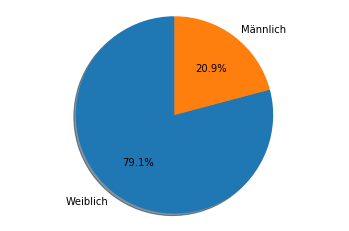

In [17]:
import matplotlib.pyplot as plt
import numpy as np

female = np.array(uniqueCustomers.where(uniqueCustomers.salutation == 'weiblich').count())
male = np.array(uniqueCustomers.where(uniqueCustomers.salutation == 'männlich').count())

x = [female, male]

labels = ["Weiblich", "Männlich"]

plt.pie(x, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

## 10) Erstellen Sie ein Balkendiagramm, dass die Verteilung der Kunden je Bundesland und je Geschlecht visualisiert. Die Verteilung soll absteigend sortiert nach Häufigkeit der Kunden je Bundesland sein.

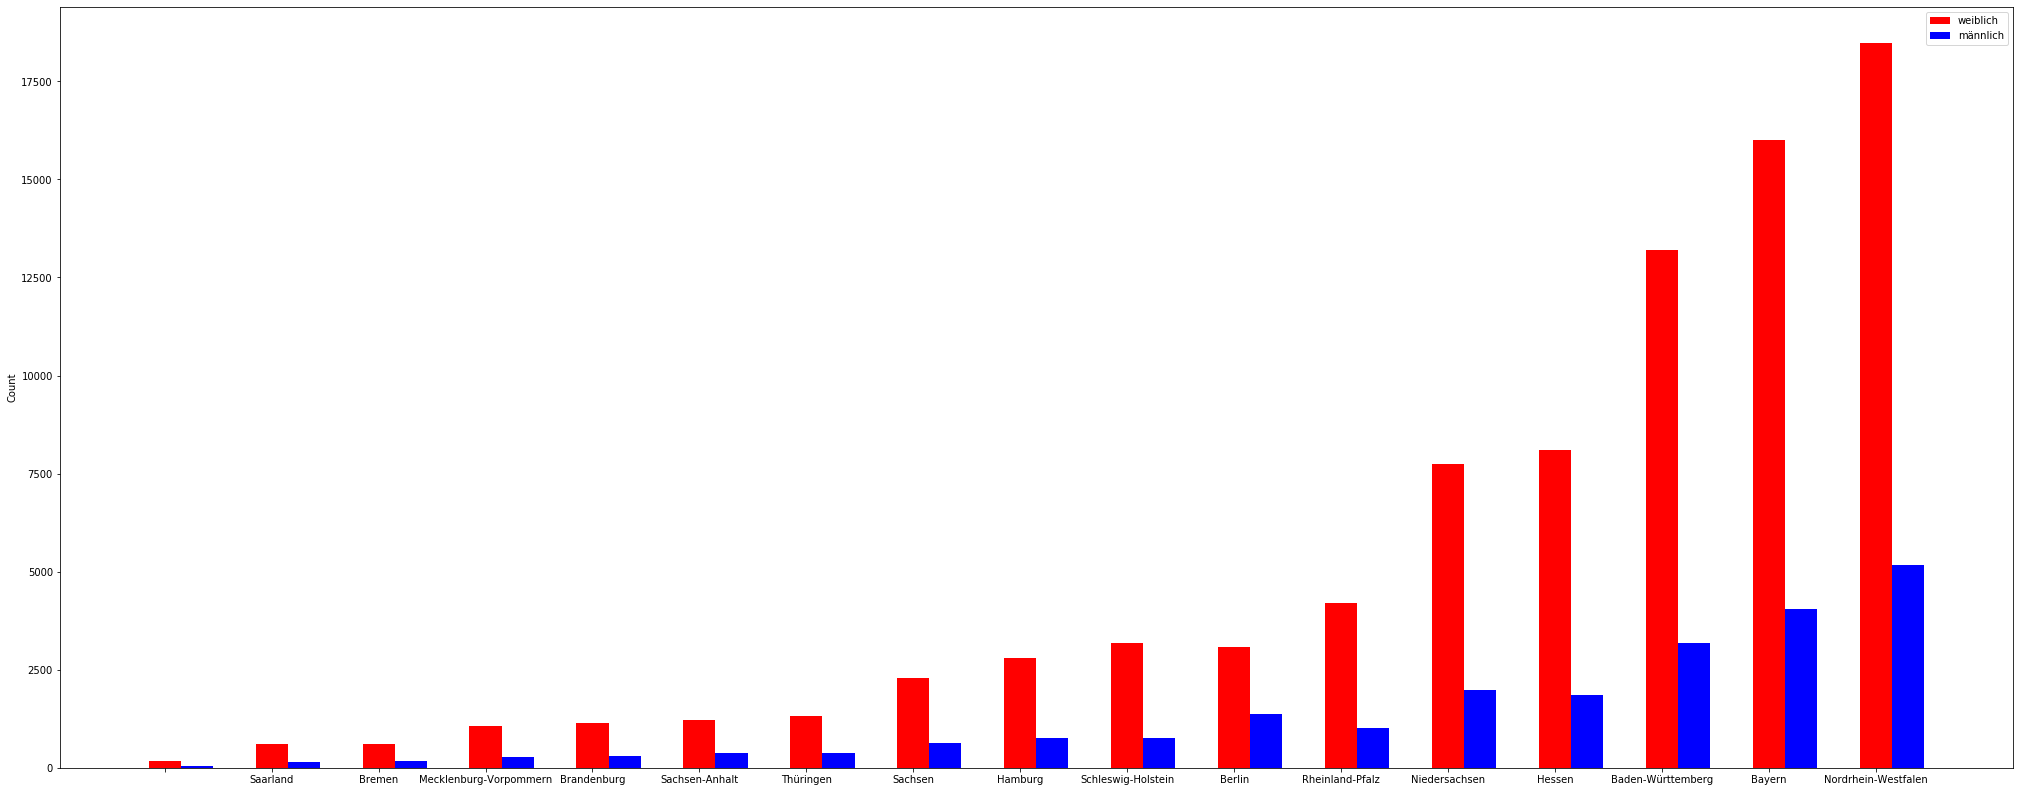

In [81]:
import numpy as np

bundesland = np.array(uniqueCustomers.groupBy("state").count().sort('state').select('count').collect()).flatten()
bundesland = zip(bundesland, np.arange(len(bundesland)))

idx = [x for _, x in sorted(bundesland)]
female = uniqueCustomers.filter(uniqueCustomers.salutation == "weiblich").groupBy("state").count().sort('state')
male = uniqueCustomers.filter(uniqueCustomers.salutation == "männlich").groupBy("state").count().sort('state')

s = np.array(female.select("state").collect()).flatten()
female = np.array(female.select("count").collect()).flatten()
male = np.array(male.select("count").collect()).flatten()

s = s[idx]
female = female[idx]
male = male[idx]
plt.style.use('seaborn-deep')
ticks = np.arange(len(s))
fig, ax = plt.subplots(figsize = (35,14))

ax.bar(ticks, female, label="weiblich", width=.30, color="red")
ax.bar(ticks + .30, male, label="männlich", width=.30, color="blue")
plt.legend()
plt.ylabel('Count')
plt.xticks(ticks, s)


plt.show()

## 11) Lesen Sie die Umsätze (iw_sales.txt) und Retouren (return_line.txt) für weitere dispositive Fragestellungen ein.

In [2]:
dSales = spark.read.option("delimiter", "\t").csv("gs://dataproc-staging-us-central1-989776300789-qenq3uts/webshop/iw_sales.txt", header="True", inferSchema=True)
dReturn = spark.read.option("delimiter", "\t").csv("gs://dataproc-staging-us-central1-989776300789-qenq3uts/webshop/iw_return_line.txt", header="True", inferSchema=True)
dSales.registerTempTable("dSales")
dReturn.registerTempTable("dReturn")
dSales.show(10)
dReturn.show(10)

+-----+-------+---------+----------+----+-------------+--------+------+----------+-----------+----------+---------------+-------------------+-------------------+
|owner|line_No|  orderNo|customerNo|type|         IWAN|quantity|amount|vat_amount|line_amount|VATpercent|bill_customerNo|          orderDate|        postingDate|
+-----+-------+---------+----------+----+-------------+--------+------+----------+-----------+----------+---------------+-------------------+-------------------+
|   IW|      3|ORD003892| KNR765310|   2|2534460662171|       1| 33.53|      39.9|       39.9|        19|      KNR765310|2010-05-11 00:00:00|2010-05-17 00:00:00|
|   IW|      2|ORD003892| KNR765310|   2|2534160651495|       1| 33.53|      39.9|       39.9|        19|      KNR765310|2010-05-11 00:00:00|2010-05-17 00:00:00|
|   IW|      1|ORD003892| KNR765310|   2|2534550694026|       1| 33.53|      39.9|       39.9|        19|      KNR765310|2010-05-11 00:00:00|2010-05-17 00:00:00|
|   IW|      4|ORD003892| KN

## 12) Gruppieren Sie die Umsätze des Jahres 2011 je Monat und stellen Sie diese in einem Balkendiagramm dar. Die Spalte orderDate ist für die Feststellung des Bestelldatums zu verwenden.

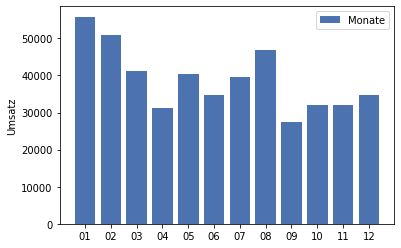

In [83]:
from pyspark.sql.functions import substring
from pyspark.sql.functions import col
sales_2011 = dSales.filter(substring(dSales.postingDate, 1, 4) == '2011') \
           .withColumn("month", substring(col('postingDate'), 6, 2))

monate = sales_2011.groupBy("month").count().sort('month')

monate_ex = np.array(monate.select("month").collect()).flatten()
umsatz = np.array(monate.select("count").collect()).flatten()



ticks = np.arange(len(monate_ex))
fig, ax = plt.subplots()

ax.bar(ticks, umsatz, label="Monate")
plt.legend()
plt.ylabel('Umsatz')
plt.xticks(ticks, monate_ex)
plt.show()

## 13) Wie viele Bestellungen (Note: Es kann durchaus mehrere Bestellpositionen zu einer Bestellung geben, jede Bestellung ist eindeutig durch die Spalte orderNo) je Kunden gibt es durchschnittlich?

In [77]:
from pyspark.sql.functions import avg
durchsBest = dSales.dropDuplicates(['orderNo']).groupBy('customerNo').count().select(avg('count')).collect()[0][0]
print("Bestellungen je Kunde durschnittlich: ", durchsBest)

Bestellungen je Kunde durschnittlich:  1.00420132353834


## 14) Was ist die durchschnittliche Anzahl an Bestellpositionen und der durchschnittliche Gesamtbetrag einer Bestellung über alle Kunden?

In [4]:
from pyspark.sql.functions import avg
from pyspark.sql.functions import sum
durchBestPo = dSales.groupBy('orderNo').count().select(avg('count')).collect()[0][0]
print("Durchscnittliche Anzahl an Bestellposition: ", durchBestPo)


spark.sql("SELECT AVG(Summe) AS Gesamtbetrag FROM (SELECT SUM(vat_amount) AS Summe FROM dSales GROUP BY orderNo)").show()
#durchGesam = dSales.groupBy("orderNo").agg(sum('vat_amount')).select(avg(sum('vat_amount'))).collect()[0][0]
#print("Durschnittliche Gesamtbetrag einer Bestlleung: ", durchGesam)

Durchscnittliche Anzahl an Bestellposition:  3.2991338274829407
+------------------+
|      Gesamtbetrag|
+------------------+
|186.53388471723503|
+------------------+



## 15) Ermitteln Sie die Anzahl der Bestellpositionen und die Anzahl der retournierten Positionen je Bundesland. Die Kundenadresse ist hier als Ort der Bestellung anzunehmen. Bestimmen Sie anschließend die Retourenquote:

In [88]:
from pyspark.sql.functions import sum

verk = dSales.join(uniqueCustomers, dSales.customerNo == uniqueCustomers.customerNo)
verkBund = verk.groupBy("state").agg(sum("quantity").alias("Bestellung"))
retour = dReturn.join(uniqueCustomers, dReturn.customerNo == uniqueCustomers.customerNo)
retourBund = retour.groupBy("state").agg(sum('quantity').alias('Retouring')) \
        .withColumnRenamed('state', 'state')
anzahl = verkBund.join(retourBund, verkBund.state == retourBund.state) \
            .withColumn("Retourenquato", col('Retouring') / col('Bestellung')) \
            .drop('state').show()

+----------+---------+-------------------+
|Bestellung|Retouring|      Retourenquato|
+----------+---------+-------------------+
|      5601|     2149|0.38368148544902697|
|     30412|    12158| 0.3997764040510325|
|      4735|     1778| 0.3755015839493136|
|     14672|     6739| 0.4593102508178844|
|     65469|    25784| 0.3938352502711207|
|     10004|     4064| 0.4062375049980008|
|     10781|     3831|0.35534737037380576|
|      2377|      877|0.36895246108540175|
|     73687|    27854|  0.378004261267252|
|      5925|     2498|0.42160337552742616|
|     31736|    12152|0.38290899924376104|
|     53150|    21165| 0.3982126058325494|
|      4541|     1791|0.39440651838802027|
|      2320|      902| 0.3887931034482759|
|     12087|     4461|0.36907421196326634|
|     17062|     6785| 0.3976673309107959|
+----------+---------+-------------------+

